In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Crop_production.csv")
data.head()

,Unnamed: 0,State_Name,Crop_Type,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
0,0,andhra pradesh,kharif,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,1
1,1,andhra pradesh,kharif,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,3
2,2,andhra pradesh,kharif,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,2
3,3,andhra pradesh,kharif,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,4
4,4,andhra pradesh,kharif,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,5


In [4]:
data.shape

(99827, 13)

In [5]:
data.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
count,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,9.982700e+04,99827.000000,99827.000000
mean,49926.686067,69.816483,41.593907,42.036373,5.643616,701.110678,26.683940,16480.164759,3.776982e+04,3.931511,11.064642
std,28826.675865,39.571385,15.052453,28.426910,0.505298,604.762055,4.851727,43608.404049,1.222565e+05,33.875783,7.736309
min,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000,1.000000
25%,24956.500000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.630000e+02,0.586601,5.000000
50%,49935.000000,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.507000e+03,1.329650,9.000000
75%,74891.500000,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8100.000000,1.440000e+04,2.997404,16.000000
max,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000,54.000000


DATA VISUALIZATION

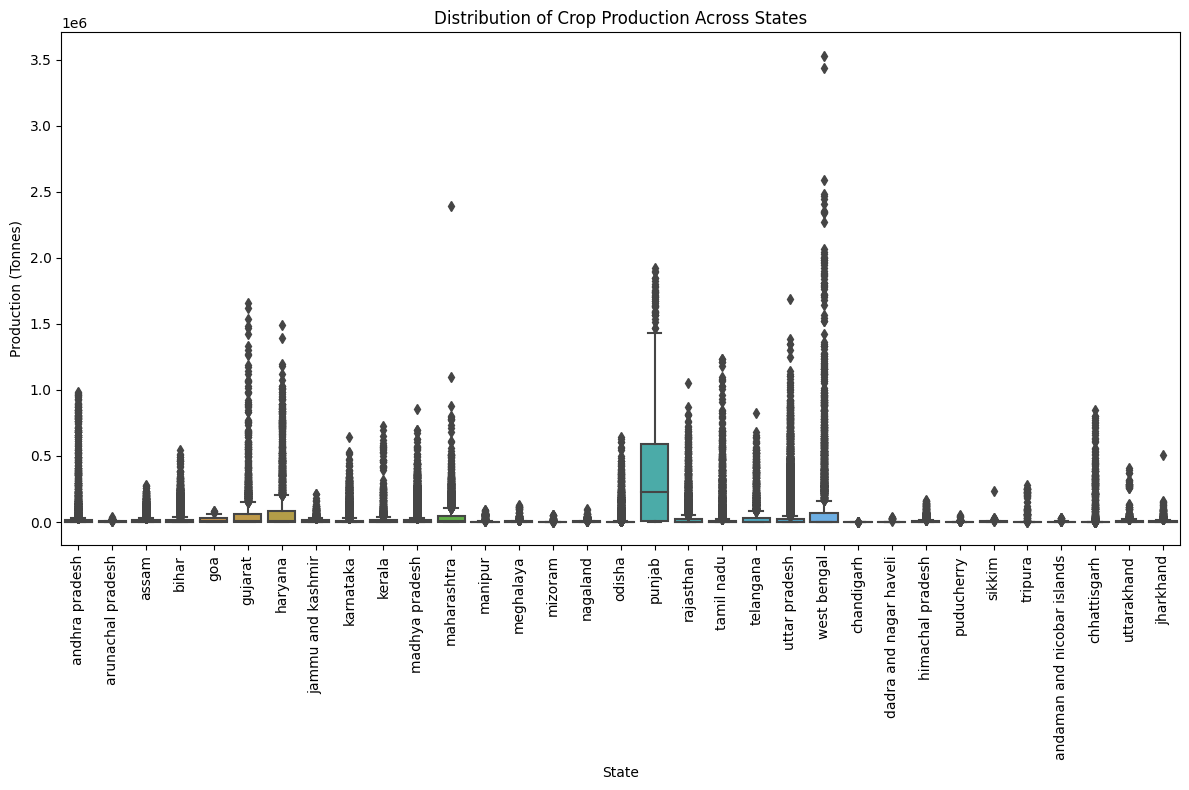

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='State_Name', y='Production_in_tons', data=data)
plt.title('Distribution of Crop Production Across States')
plt.xlabel('State')
plt.ylabel('Production (Tonnes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

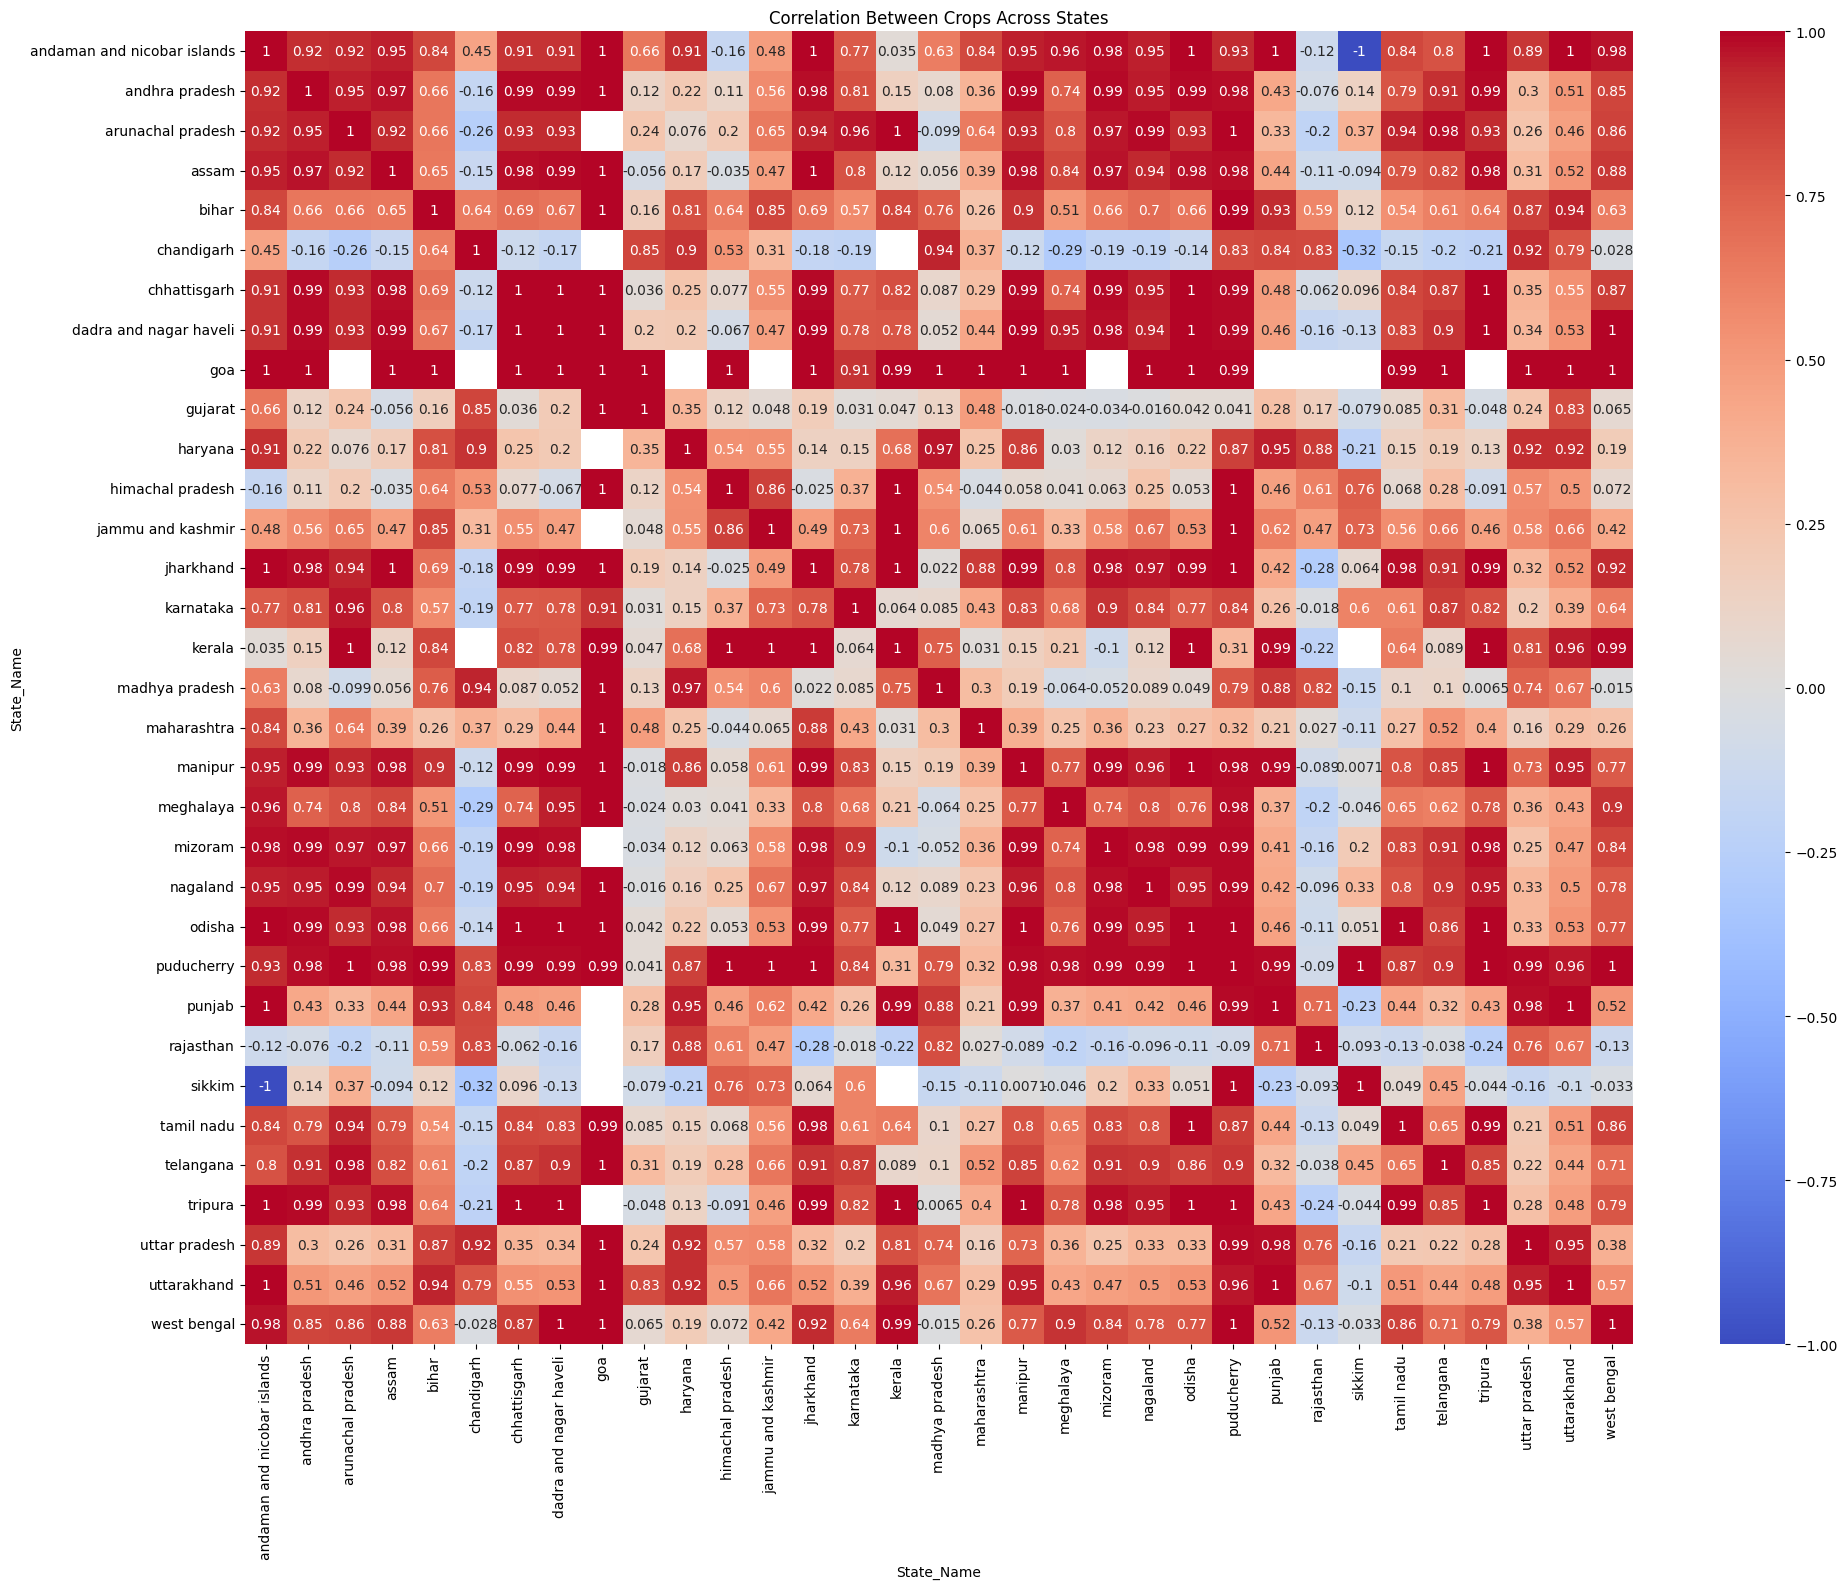

In [7]:
crop_correlation = data.pivot_table(index='Crop', columns='State_Name', values='Production_in_tons', aggfunc='sum')
plt.figure(figsize=(20, 16))
sns.heatmap(crop_correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Crops Across States')
plt.tight_layout()
plt.show()

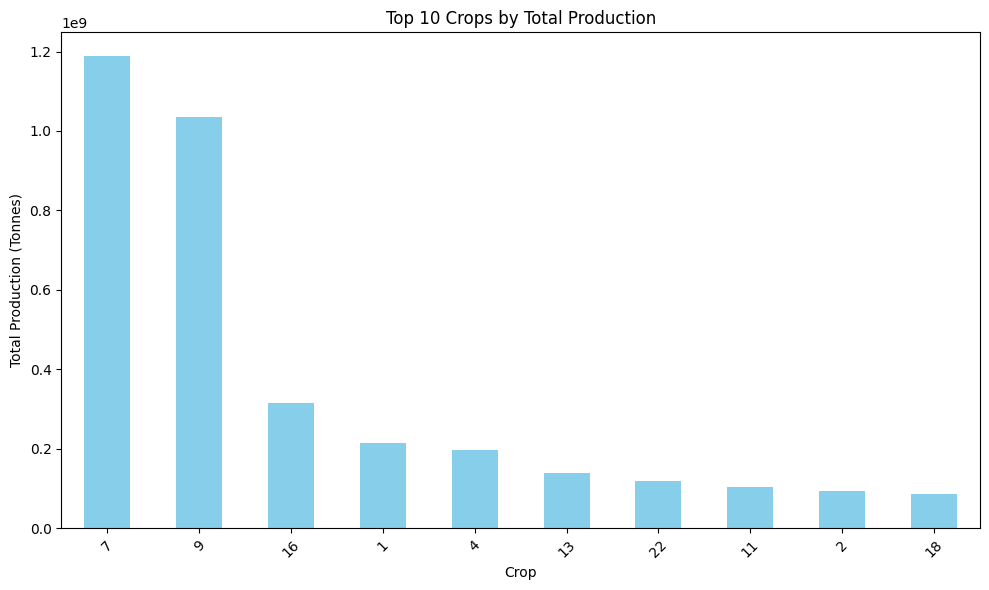

In [8]:
total_production = data.groupby('Crop')['Production_in_tons'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
total_production.plot(kind='bar', color='skyblue')
plt.title('Top 10 Crops by Total Production')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

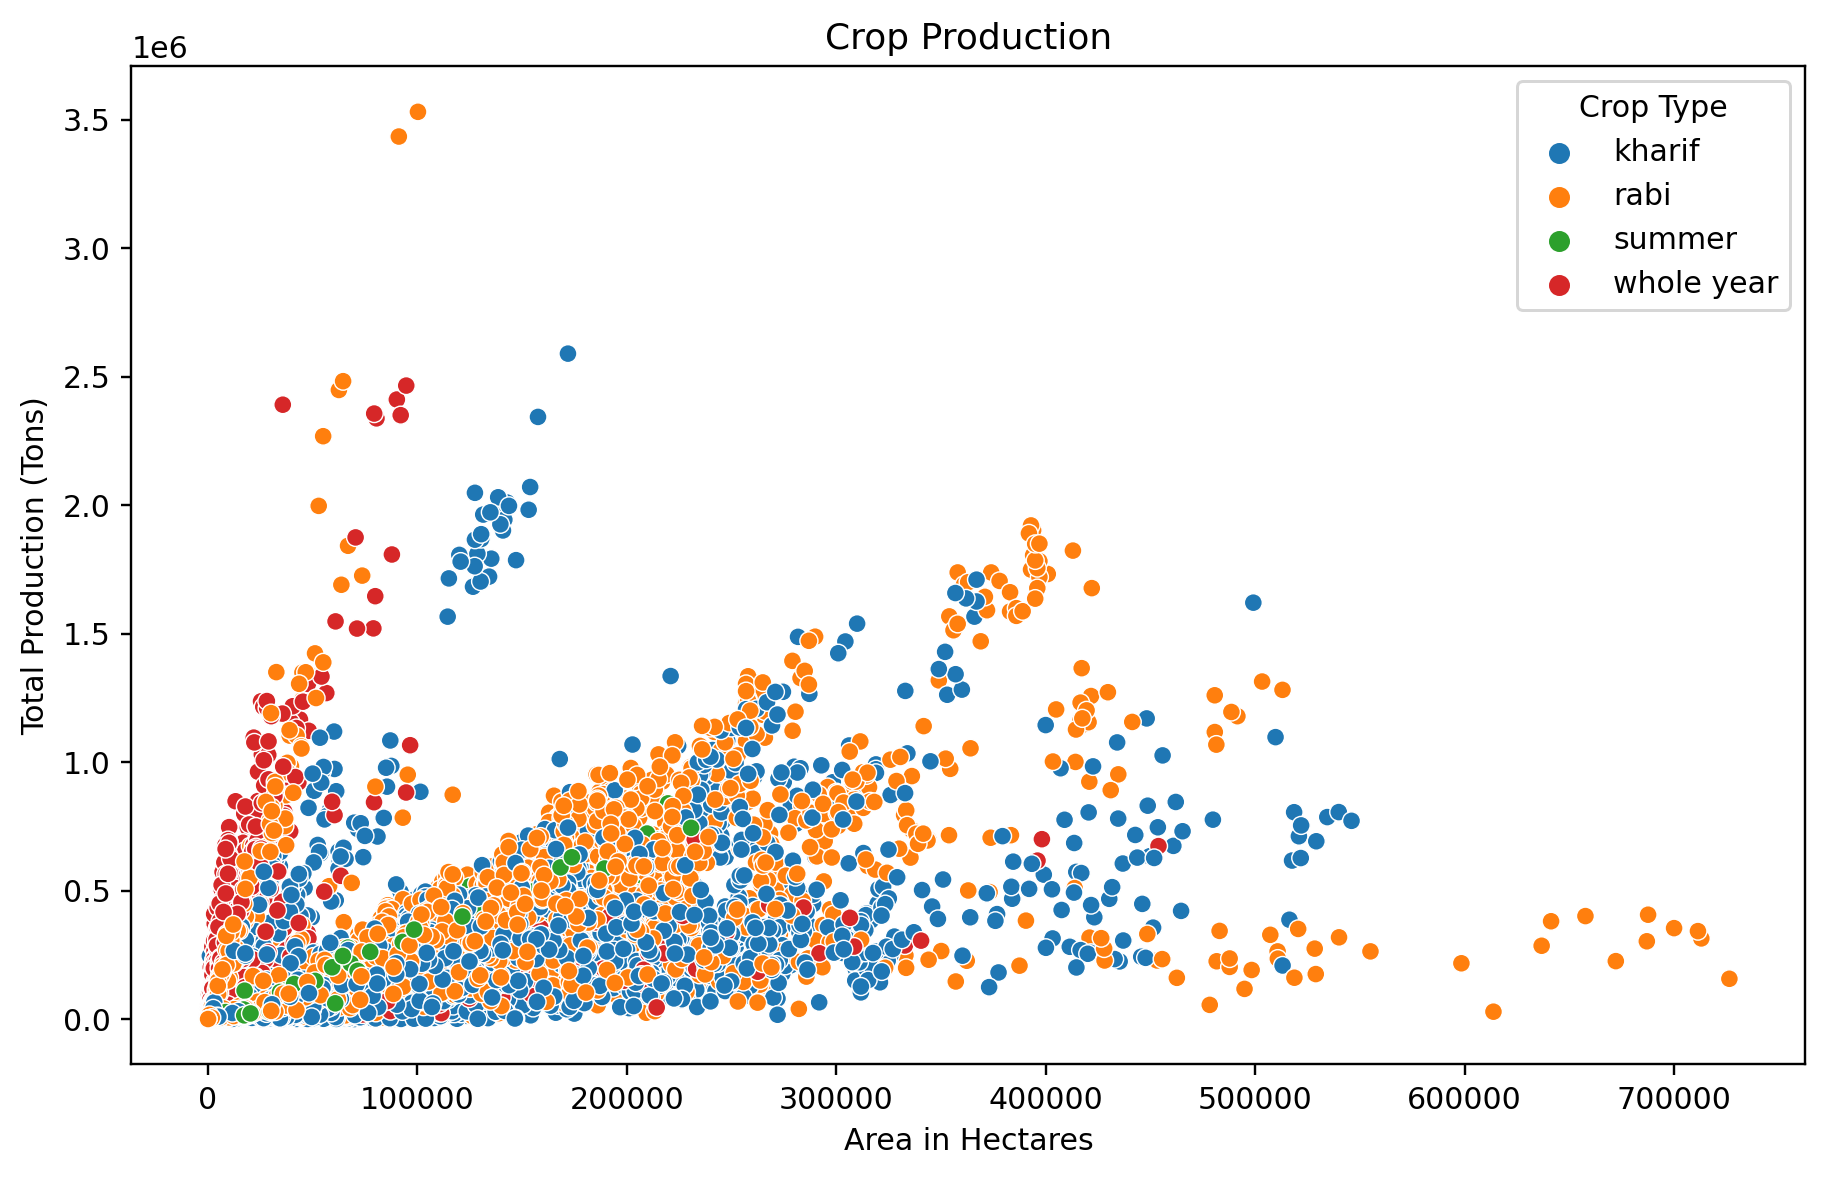

In [9]:
plt.figure(figsize=(10, 6), dpi=216)
sns.scatterplot(x=data['Area_in_hectares'], 
                y=data['Production_in_tons'], hue=data['Crop_Type'])
plt.title('Crop Production')
plt.xlabel('Area in Hectares')
plt.ylabel('Total Production (Tons)')
plt.legend(title='Crop Type');

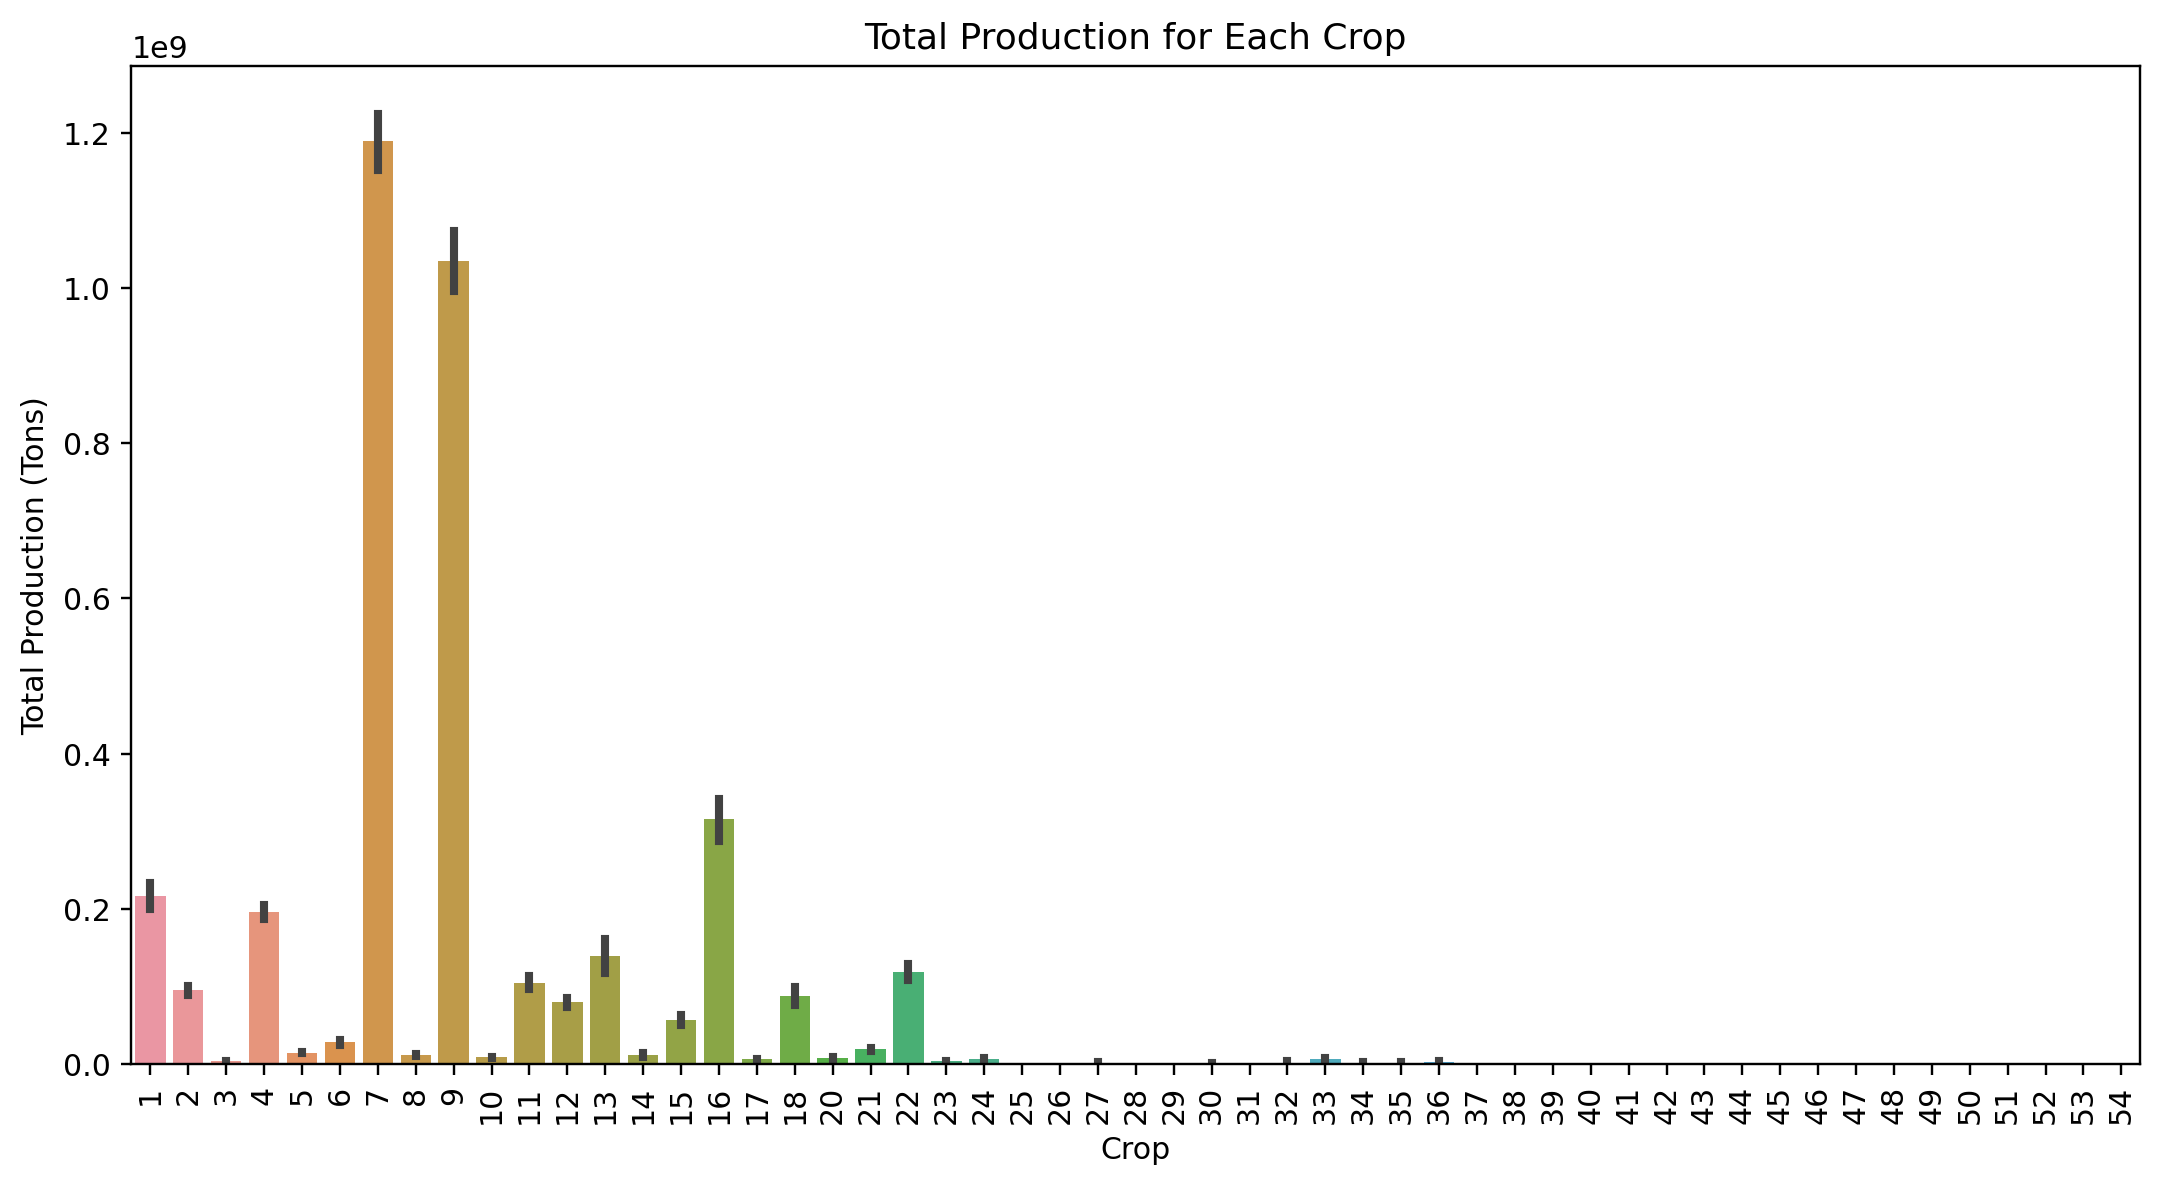

In [10]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=data, x='Crop', y='Production_in_tons', estimator=sum)
plt.xlabel('Crop')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production for Each Crop')
plt.xticks(rotation=90);

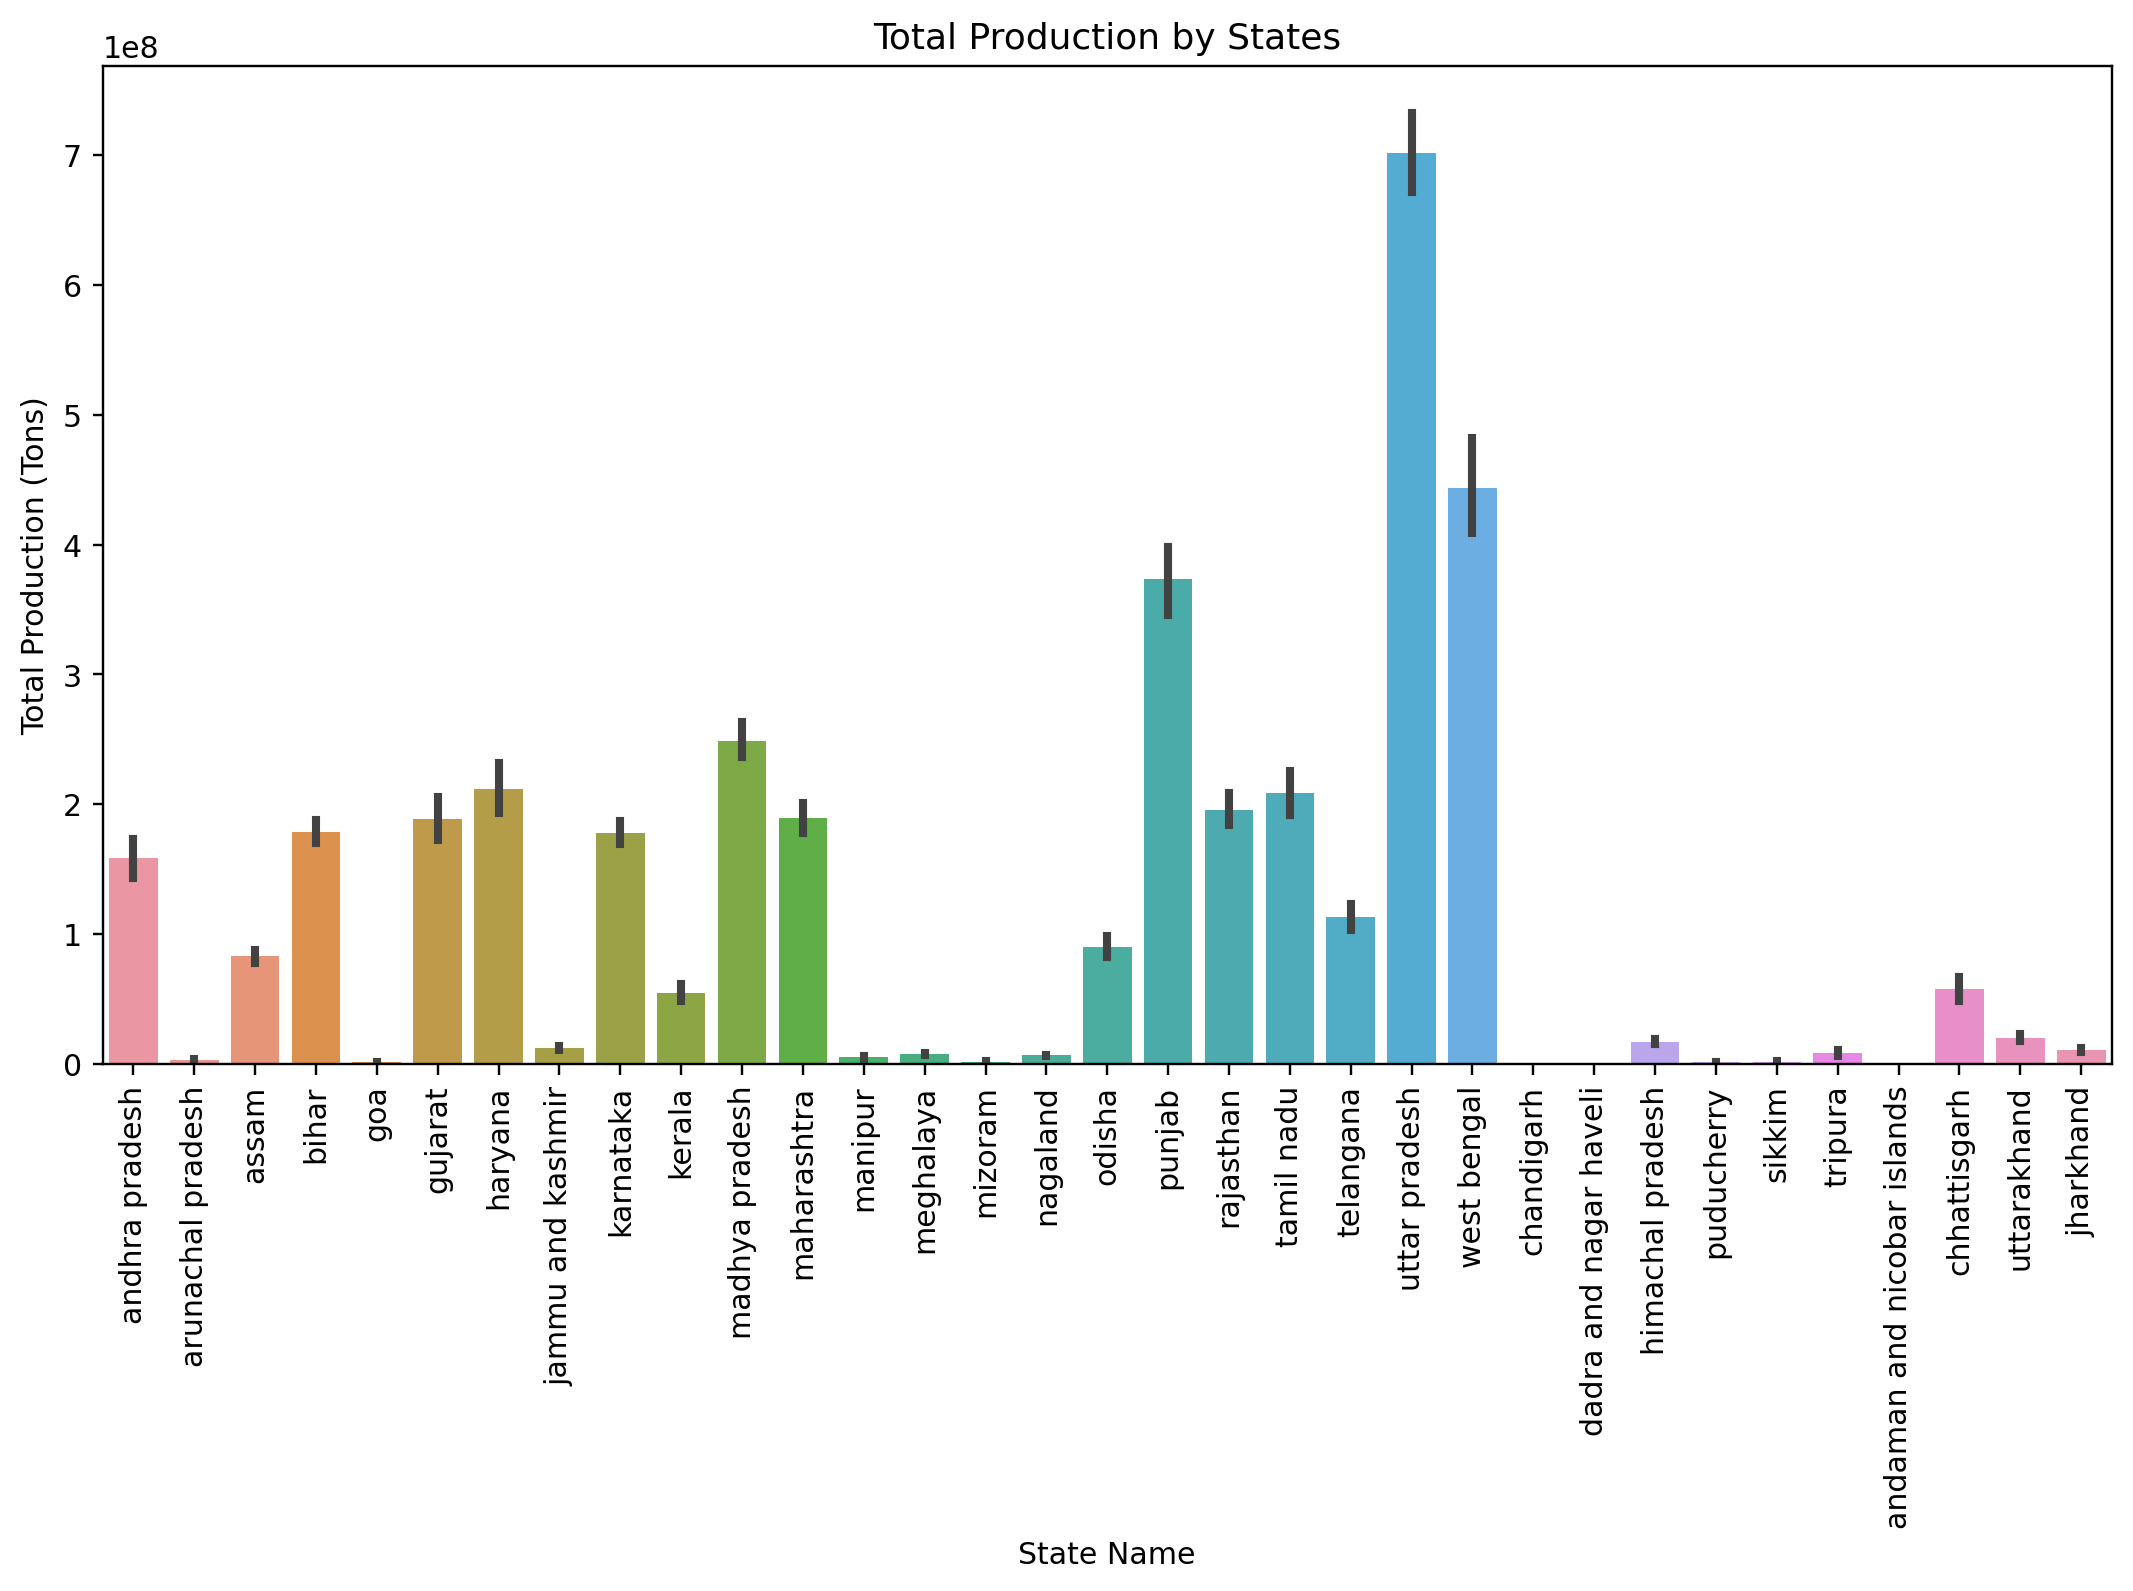

In [11]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=data, x='State_Name', y='Production_in_tons', estimator=sum)
plt.xlabel('State Name')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production by States')
plt.xticks(rotation=90);


In [12]:
from sklearn.preprocessing import KBinsDiscretizer

bins = 3  # Choose the number of bins/classes
kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
data['Crop_class'] = kbins.fit_transform(data['Crop'].values.reshape(-1, 1)).astype(int)

In [13]:
X = data.drop(columns=['State_Name','Crop_Type','Area_in_hectares','Production_in_tons','Crop'], axis = 1)
Y = data['Crop']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=44)

REGRESSOR

In [20]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, Y_train)

# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate accuracy (you can use any appropriate metric depending on your problem)
train_accuracy = model.score(X_train, Y_train)
print("Train Accuracy:", train_accuracy)

test_accuracy = model.score(X_test, Y_test)
print("Train Accuracy:", test_accuracy)

train_accuracy = mean_squared_error(Y_train, train_preds)
test_accuracy = mean_squared_error(Y_test, test_preds)

print("Train Accuracy (MSE):", train_accuracy)
print("Test Accuracy (MSE):", test_accuracy)

Train Accuracy: 0.994585888360093
Train Accuracy: 0.993448941638426
Train Accuracy (MSE): 0.32410041550785884
Test Accuracy (MSE): 0.39189232726312956


CLASSIFIER

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable to encode classes starting from 0
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Now, classes in Y_train_encoded start from 0 and are contiguous

# Initialize XGBClassifier
model = XGBClassifier()

# Fit the model with the encoded target variable
model.fit(X_train, Y_train_encoded)

# Predictions
train_preds_encoded = model.predict(X_train)
test_preds_encoded = model.predict(X_test)

# Inverse transform the predicted labels to get the original class labels
train_preds = label_encoder.inverse_transform(train_preds_encoded)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [17]:
train_accuracy = accuracy_score(Y_train, train_preds)
test_accuracy = accuracy_score(Y_test, test_preds)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9917999942757377
Test Accuracy: 0.9813349360579652


In [18]:
train_accuracy = mean_squared_error(Y_train, train_preds)
test_accuracy = mean_squared_error(Y_test, test_preds)

print("Train Accuracy (MSE):", train_accuracy)
print("Test Accuracy (MSE):", test_accuracy)

Train Accuracy (MSE): 0.20500014310655715
Test Accuracy (MSE): 0.5020868810310862
